# in class exercises for 10.17.2018 (FFT + practice plotting + boolean indexing)

[npy file format](https://www.numpy.org/devdocs/reference/generated/numpy.lib.format.html)

[npz file format (save several arrays)](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.savez.html)

[article about advantages of npy/npz format compared to csv and other common formats](https://towardsdatascience.com/why-you-should-start-using-npy-file-more-often-df2a13cc0161)



## First import data from eeg_data00.npz

In [54]:
# start by importing the modules that you'll need. 
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## load eeg_data00.npz...
* you should find that it has three arrays: data, tx, and sr (with 'data' a #trials x # timepoints array containing the EEG data, the time of each data acquisition in tx, and the sample rate stored as sr).  

In [55]:
# load the data...
eeg = np.load('eeg_data00.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...
# which will tell us that there 960 trials and 876 timepoints 
# per trial sampled at 250Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']      # sample rate
tx = eeg['tx']      # time of data
# now you can just write data instead of eeg['data'] (and can for tx and sr as well...)

Shape of the big eeg data set:  (960, 876)
Sample rate:  250


## First - plot the data! (always do this first). 
* Compute the mean across all trials and then plot with tx on the xaxis. 
* Remember - good form is to specify the axis that you want to average over when using np.mean!

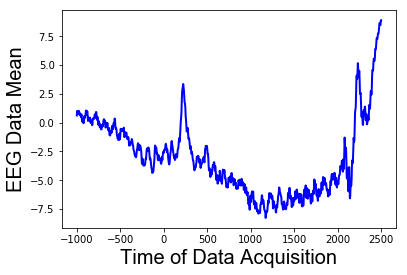

In [56]:
# mean of the EEG data, axis is rows (each row is 1 trial)
mean_alltrials = np.mean(data, axis=0)

# plot with tx on x-axis, mean on y-axis)
plt.plot(tx, mean_alltrials, color='b', linewidth = 2)    

# put some labels on the axes
plt.xlabel('Time of Data Acquisition', **fig_font)
plt.ylabel('EEG Data Mean', **fig_font)

plt.show()


## Now grab the data from time 0 until time 2000 and FFT it! 
* hint: you can use boolean indexing by selecting the columns from the 'data' matrix that meet: (tx>=0)  & (tx<2000)
* while you're at it, go ahead and grab the timepoints corresponding to that interval as well so that you have an array for the x-axis of any plots

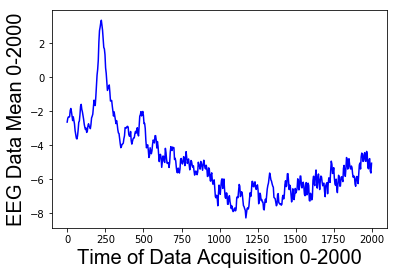

In [57]:
#boolean indexing to grab data from time 0 to time 2000

data_grab = data[:,(tx>=0) & (tx<2000)]
time_grab = tx[(tx>=0) & (tx<2000)]

mean_data_grab = np.mean(data_grab, axis=0)

plt.plot(time_grab, mean_data_grab, color='b')    

# put some labels on the axes
plt.xlabel('Time of Data Acquisition 0-2000', **fig_font)
plt.ylabel('EEG Data Mean 0-2000', **fig_font)

plt.show()





## Do the FFT on the data averaged across trials (so first avg, then FFT)

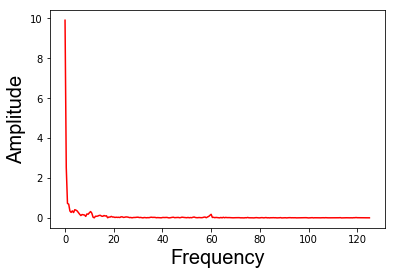

In [58]:
# FFT on mean_data_grab
# rfft = fft for real valued inputs
data_fft = np.fft.rfft(mean_data_grab)

# normalize by the number of data points, 
# x2 cause we're ditching the negative frequencies when we deal with real numbers
amp = np.abs(data_fft)
amp = (amp  / mean_data_grab.size ) * 2 

# FREQUENCY AXIS, 1/sr = dt = time step
# rfftfreq --> return the Discrete Fourier Transform sample frequencies
freq = np.fft.rfftfreq(mean_data_grab.size, 1/sr)

plt.plot(freq, amp, 'r') 
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.show()



##### Now lets look at a few frequency segments to see what is going on
* First plot just the frequencies in between 55 and 65Hz (use boolean indexing)
* Then look at the frequencies in between 5 and 20Hz

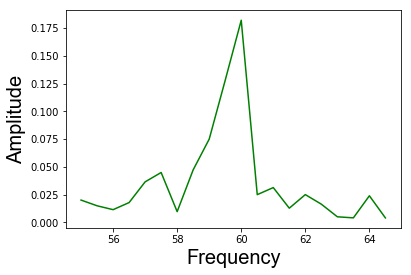

In [59]:
# Boolean indexing
freq_55_65_index = (freq>=55) & (freq<65)

plt.plot(freq[freq_55_65_index], amp[freq_55_65_index], 'g') 
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.show()

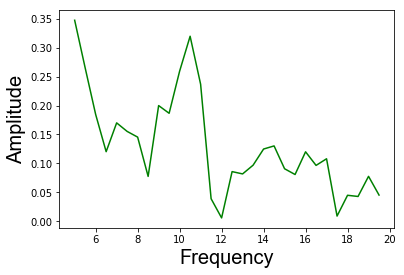

In [60]:
# Boolean indexing
freq_5_20_index = (freq>=5) & (freq<20)

plt.plot(freq[freq_5_20_index], amp[freq_5_20_index], 'g') 
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.show()

## Remember what the above plots look like, and then do something that *seems* just a little different
* FFT each trial 
* Then compute the amplitude on each trial
* Then compute the average amplitude across all trials
* Then plot like you did above - first over all frequs, then zoom in and plot the 55-65hz window and the 5-20Hz window 
* To make this work, note that np.fft.rfft can operate on the entire data matrix at once. You should ALWAYS specify the axis that you want the FFT to work over (in this case the time axis, or axis 1). np.fft.rfft will default to the LAST axis if you specify nothing, which in this case is ok but it would totally NOT be ok if your data were transposed
* hint: handy to store the shape of the data matrix before you do all this so that you can pass in the number of timepoints to the amplitude normalization function and the freq-axis function. e.g. r,c = data.shape

[np.fft.rfft documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.fft.rfft.html)

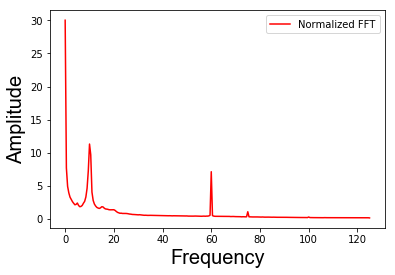

In [61]:
# Storing shape of data matrix 
r,c = data_grab.shape

# FFT each trial (indexing by row)
fft_trials = np.fft.rfft(data_grab, axis=1)

# Compute amplitute on each trial  
amp = (np.abs(fft_trials) / c) * 2

# Compute average amp across all trials at specific timepoint
avg_amp = np.mean(amp, axis=0)

# FREQUENCY AXIS, 1/sr = dt = time step
# rfftfreq --> return the Discrete Fourier Transform sample frequencies
freq = np.fft.rfftfreq(c, 1/sr)

plt.plot(freq, avg_amp, 'r') 
plt.legend(['Normalized FFT'], loc='best', fancybox=1) 
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.show()


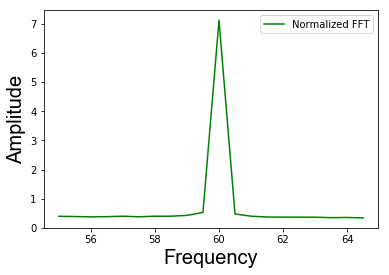

In [62]:
# Boolean indexing
freq_55_65_index = (freq>=55) & (freq<65)

plt.plot(freq[freq_55_65_index], avg_amp[freq_55_65_index], 'g') 
plt.legend(['Normalized FFT'], loc='best', fancybox=1) 
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.show()

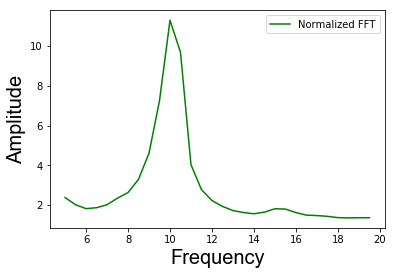

In [63]:
# Boolean indexing
freq_5_20_index = (freq>=5) & (freq<20)

plt.plot(freq[freq_5_20_index], avg_amp[freq_5_20_index], 'g') 
plt.legend(['Normalized FFT'], loc='best', fancybox=1)
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.show()

## Now compare the plots you got just now (FFT each trial, then compute amp, then average) with the plots you got when you averaged in time domain first and THEN did the FFT. Why are they different?
* hint: think about phase...

## Switch to a new data set...load eeg_data01.npz. To make it easy I renamed all the variables in this data set to match the var names in the last data set (data, sr, tx)

In [80]:
# load the data...
eeg = np.load('eeg_data01.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 1600 trials and 4102 timepoints per trial sampled
# at 1024Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if yieldou want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']


Shape of the big eeg data set:  (1600, 4102)
Sample rate:  1024
1024


## Plot the data, just like we did above

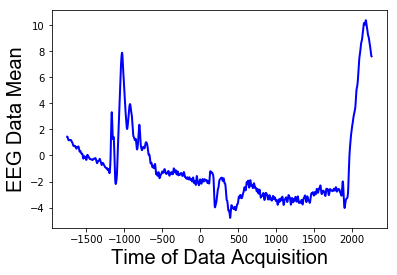

In [65]:
#same code as above#
# mean of the EEG data, axis is columns (each row is 1 trial)
mean_alltrials = np.mean(data, axis=0)

# plot with tx on x-axis, mean on y-axis)
plt.plot(tx, mean_alltrials, color='b', linewidth = 2)    

# put some labels on the axes
plt.xlabel('Time of Data Acquisition', **fig_font)
plt.ylabel('EEG Data Mean', **fig_font)

plt.show()

## Now segment the data from time 0 to time 1753 and plot to make sure it looks right

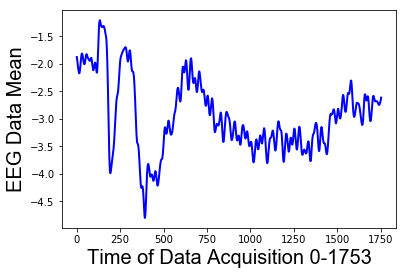

(1600, 1796)


In [84]:
# segment the data with boolean indexing
data_seg = data[:,(tx>=0) & (tx<1753)]
time_seg = tx[(tx>=0) & (tx<1753)]
mean_seg = np.mean(data_seg, axis=0)

# plot with tx on x-axis, mean on y-axis)
plt.plot(time_seg, mean_seg, color='b', linewidth = 2)    

# put some labels on the axes
plt.xlabel('Time of Data Acquisition 0-1753', **fig_font)
plt.ylabel('EEG Data Mean', **fig_font)

plt.show()

print(data_seg.shape)

## Next:
* compute the FFT of the data on each trial
* then compute the amp on each trial
* then plot the average amplitude over a window from 12Hz to 35Hz

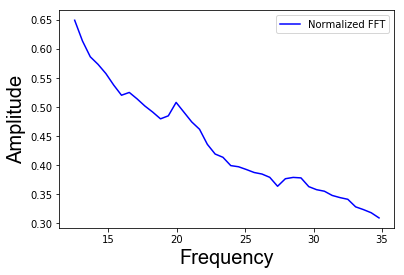

In [88]:
# Storing shape of data matrix 
r,c = data_seg.shape

# FFT each trial (indexing by row)
fft_trials = np.fft.rfft(data_seg, axis=1)

# Compute amplitute on each trial  
amp = (np.abs(fft_trials) / c) * 2

# Compute average amp across all trials at specific timepoint
avg_amp = np.mean(amp, axis=0)


# FREQUENCY AXIS, 1/sr = dt = time step
# rfftfreq --> return the Discrete Fourier Transform sample frequencies
freq = np.fft.rfftfreq(c, 1/sr)

# Create 12-35 Hz window with Boolean indexing
# Boolean indexing
freq_12_35_index = (freq>=12) & (freq<35)



plt.plot(freq[freq_12_35_index], avg_amp[freq_12_35_index], 'b') 
plt.legend(['Normalized FFT'], loc='best', fancybox=1) 
plt.xlabel(`Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.show()

## Not much going on...so now 
* average the data in the time domain (i.e. avg across all trials)
* then FFT, compute amp, then plot over the same window

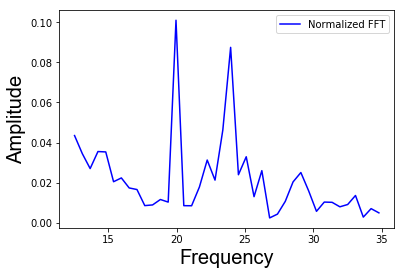

In [90]:
# average data in time domain
data_seg_mean = np.mean(data_seg, axis=0)

# FFT 
sp = np.fft.rfft(data_seg_mean)

# compute amplitude
amp = (np.abs(sp) / data_seg_mean.size) * 2

# frequency axis
freq = np.fft.rfftfreq(data_seg_mean.size, 1/sr)

#index for same window
freq_12_35_index = (freq>=12) & (freq<35)

plt.plot(freq[freq_12_35_index], amp[freq_12_35_index], 'b') 
plt.legend(['Normalized FFT'], loc='best', fancybox=1) 
plt.xlabel('Frequency', **fig_font)
plt.ylabel('Amplitude', **fig_font)
plt.show()





# Compute amplitute on each trial  
amp = (np.abs(fft_trials) / c) * 2

# Compute average amp across all trials at specific timepoint
avg_amp = np.mean(amp, axis=0)


# FREQUENCY AXIS, 1/sr = dt = time step
# rfftfreq --> return the Discrete Fourier Transform sample frequencies
freq = np.fft.rfftfreq(c, 1/sr)

# Create 12-35 Hz window with Boolean indexing
# Boolean indexing
freq_12_35_index = (freq>=12) & (freq<35)


## now what do you see? 
* what can infer about the experiment based on the difference in the amplitude spectrum from the two different methods (FFT all trials, then convert to amp, then average versus Average in time domain, then FFT and then compute amp)

* Amp spectrum is larger in FFT all trials --> amp --> average
* SNR is better with average in time domina --> FFT --> compute amp